### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [1]:
#pip install category_encoders
#pip install -U varname

In [2]:
import pandas as pd
import numpy as np
import category_encoders as ce

# Models
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
from varname import nameof

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

/Users/maria/.local/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
auto_data = pd.read_csv("audi.csv")
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000,10668.000,10668.000,10668.000,10668.00,10668.000
mean,2017.101,22896.685,24827.244,126.011,50.77,1.931
std,2.167,11714.842,23505.257,67.170,12.95,0.603
min,1997.000,1490.000,1.000,0.000,18.90,0.000
25%,2016.000,15130.750,5968.750,125.000,40.90,1.500
50%,2017.000,20200.000,19000.000,145.000,49.60,2.000
75%,2019.000,27990.000,36464.500,145.000,58.90,2.000
max,2020.000,145000.000,323000.000,580.000,188.30,6.300


In [4]:
# Проанализируем данные

In [5]:
for col in auto_data.columns:
    print()
    print(col,': ', auto_data[col].unique())


model :  [' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']

year :  [2017 2016 2019 2015 2014 2018 2013 2020 2004 2009 2012 2010 2007 2011
 2008 2003 2005 2002 2006 1998 1997]

price :  [12500 16500 11000 ... 21291 12380  3750]

transmission :  ['Manual' 'Automatic' 'Semi-Auto']

mileage :  [15735 36203 29946 ...  4018  1978  8646]

fuelType :  ['Petrol' 'Diesel' 'Hybrid']

tax :  [150  20  30 145 125 200   0 205 160 235 260 325 300 165 240 565 265 135
 570 555 140 330 305 155 580 290 195 115 295 220 230 280 315 535 190 540
 515]

mpg :  [ 55.4  64.2  67.3  49.6  58.9  61.4  70.6  60.1  57.6  52.3  53.3  56.5
  47.1  47.9  62.8  76.3  51.4  65.7  68.9  50.4  72.4  38.7  74.3  42.8
  83.1  57.7  54.3  40.4  44.1  33.2  42.2  44.8  48.7  37.7  35.8  40.9
  45.6  34.   29.4  39.8  39.2  41.5  38.2  32.1  30.7  34.9  43.5  36.2
  30.1  32.8  29.7  26.4  33.6  34.5  46.3  37

In [6]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [7]:
normal_df = MinMaxScaler().fit_transform(auto_data[["year", "price", "mileage", "tax", "mpg", "engineSize"]])
scaled_df = pd.DataFrame(normal_df, columns=["year", "price", "mileage", "tax", "mpg", "engineSize"])

<AxesSubplot:>

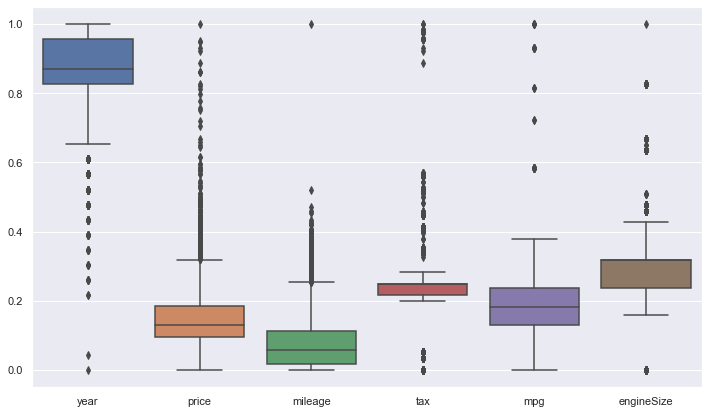

In [8]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=scaled_df)

In [9]:
# Видим, что есть очень большой одиночный выброс у mileage. Уберем его.

In [10]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000,10668.000,10668.000,10668.000,10668.00,10668.000
mean,2017.101,22896.685,24827.244,126.011,50.77,1.931
std,2.167,11714.842,23505.257,67.170,12.95,0.603
min,1997.000,1490.000,1.000,0.000,18.90,0.000
25%,2016.000,15130.750,5968.750,125.000,40.90,1.500
50%,2017.000,20200.000,19000.000,145.000,49.60,2.000
75%,2019.000,27990.000,36464.500,145.000,58.90,2.000
max,2020.000,145000.000,323000.000,580.000,188.30,6.300


In [11]:
auto_data = auto_data[auto_data['mileage'] != auto_data['mileage'].max()]

In [12]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10667.000,10667.000,10667.000,10667.000,10667.000,10667.000
mean,2017.102,22898.598,24799.291,126.004,50.771,1.931
std,2.166,11713.724,23328.364,67.170,12.950,0.603
min,1997.000,1490.000,1.000,0.000,18.900,0.000
25%,2016.000,15149.500,5964.500,125.000,40.900,1.500
50%,2017.000,20200.000,19000.000,145.000,49.600,2.000
75%,2019.000,27990.000,36461.500,145.000,58.900,2.000
max,2020.000,145000.000,168017.000,580.000,188.300,6.300


In [13]:
auto_data = auto_data[auto_data['price'] != auto_data['price'].min()]

In [14]:
# Так же объем двигателя не может быть 0, заменим на среднее

In [15]:
auto_data.loc[:, ['engineSize']] = auto_data['engineSize'].replace(0, auto_data['engineSize'].quantile(0.5))

In [16]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10666.000,10666.000,10666.000,10666.000,10666.000,10666.000
mean,2017.103,22900.605,24792.147,125.994,50.771,1.941
std,2.162,11712.439,23317.785,67.164,12.951,0.586
min,1997.000,1699.000,1.000,0.000,18.900,1.000
25%,2016.000,15162.250,5960.250,125.000,40.900,1.500
50%,2017.000,20200.000,19000.000,145.000,49.600,2.000
75%,2019.000,27990.000,36461.000,145.000,58.900,2.000
max,2020.000,145000.000,168017.000,580.000,188.300,6.300


In [17]:
# Можем построить графики, чтобы посмотреть на зависимость призанков друг от друга. Для линейной регрессии необходимо, 
# чтобы признаки были независимы друг от друга.

In [18]:
# sns.pairplot(auto_data)

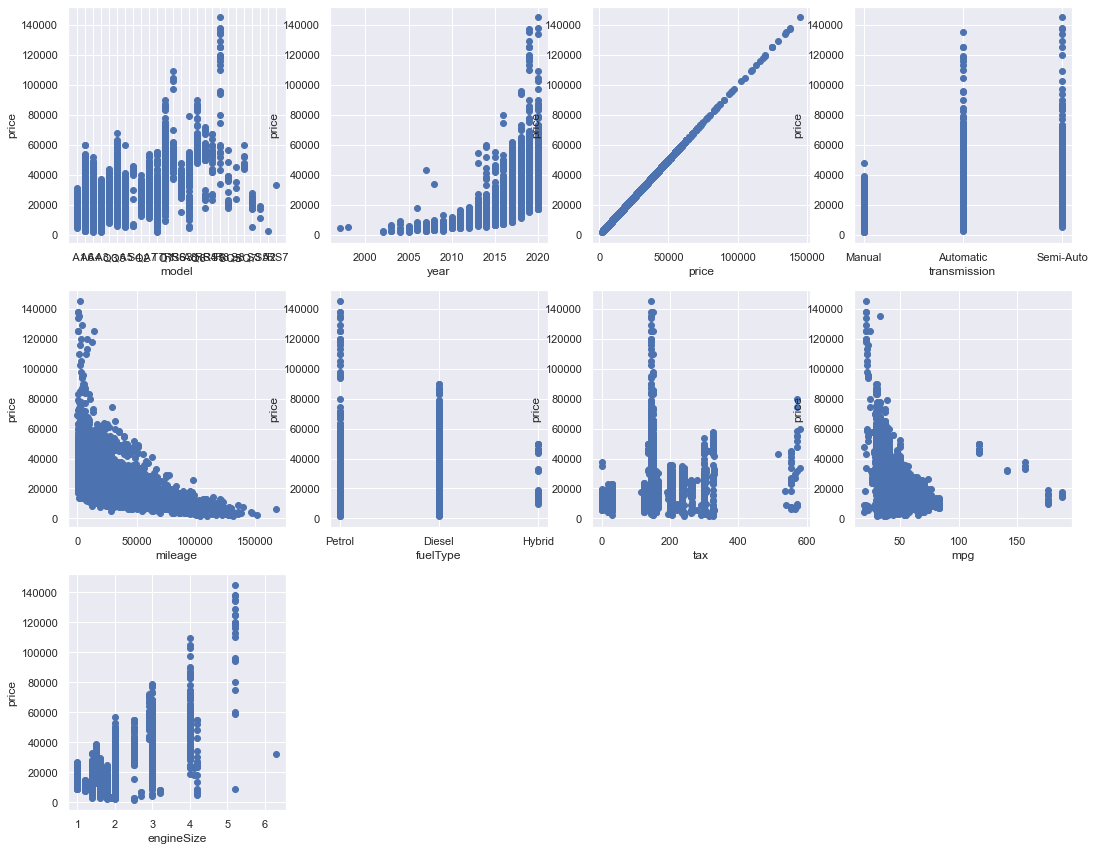

In [19]:
plt.figure(figsize=(18,20))
for i, column in enumerate(auto_data.columns):
    plt.subplot(4, 4, i + 1)
    plt.scatter(auto_data[column], auto_data['price'])
    plt.xlabel(column)
    plt.ylabel('price')

<AxesSubplot:>

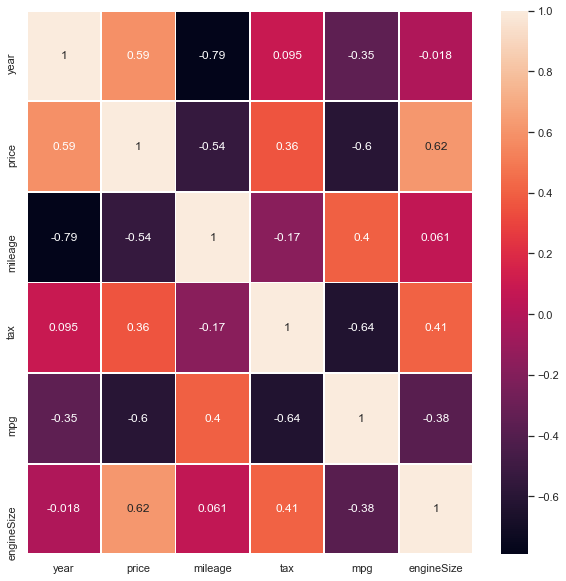

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(), annot = True, linewidths=0.7, ax=ax )

<AxesSubplot:>

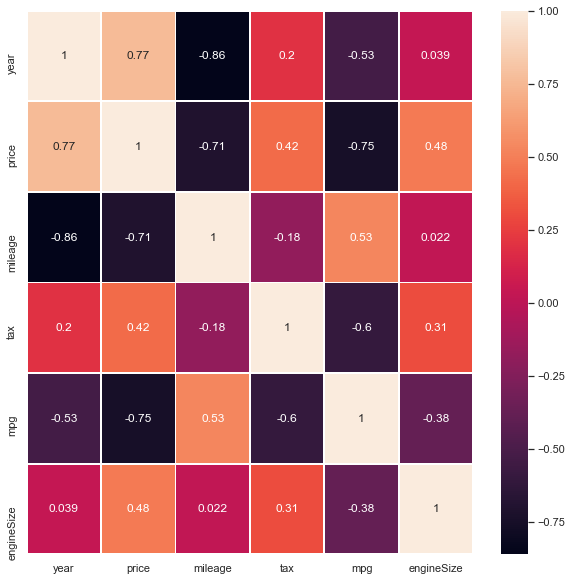

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax )

In [22]:
# Если на графики смотреть устали, то можем воспользоваться Variance Influence Factor -
# https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

In [23]:
def get_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    return(vif)

In [24]:
# Кроме того у нас есть в таблице категориальные признаки - 'model','transmission','fuelType'
# Для работы с которыми надо бы представить их в заколированном виде 

In [25]:
auto_data_dummy = pd.get_dummies(data = auto_data, columns = ['model','transmission','fuelType']) #OneHot кодирование
auto_data_dummy.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [26]:
# Посмотрим мультиколлинеарность с помощью VIF
# Исключим заранее столбец price

In [27]:
get_vif(auto_data_dummy.loc[:, auto_data_dummy.columns != 'price'])

/Users/maria/.pyenv/versions/3.9.1/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,year,3.060
1,mileage,3.058
2,tax,2.175
3,mpg,5.193
4,engineSize,4.490
5,model_ A1,inf
6,model_ A2,inf
7,model_ A3,inf
8,model_ A4,inf
9,model_ A5,inf


In [28]:
# Видим высокую долю зависимости в столбце VIF
# Модели вида Ridge, Lasso Regression должны справляться с мультиколлинеарностью, а для обычной регрессии
# такое не пройдет, поэтому удалим некоторые столбцы

In [29]:
auto_data_dummy_dropped = auto_data_dummy.drop(['model_ A1'],axis = 1)
get_vif(auto_data_dummy_dropped.loc[:, auto_data_dummy_dropped.columns != 'price'])

/Users/maria/.pyenv/versions/3.9.1/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,year,3.060
1,mileage,3.058
2,tax,2.175
3,mpg,5.193
4,engineSize,4.490
5,model_ A2,1.007
6,model_ A3,2.202
7,model_ A4,2.341
8,model_ A5,2.043
9,model_ A6,2.121


In [30]:
# Видим, что модели машин сталии более независимыми признаками
# разберемся с топливом и трансмиссией

In [31]:
auto_data_dummy_dropped= auto_data_dummy_dropped.drop(['fuelType_Diesel', 'transmission_Automatic', 'year'],axis = 1)
get_vif(auto_data_dummy_dropped.loc[:, auto_data_dummy_dropped.columns != 'price'])
#Получили dummy кодирование

,variables,VIF
0,mileage,2.814
1,tax,7.703
2,mpg,17.624
3,engineSize,32.549
4,model_ A2,1.002
5,model_ A3,2.551
6,model_ A4,2.607
7,model_ A5,2.173
8,model_ A6,2.206
9,model_ A7,1.380


In [32]:
#Так как много различных моделей, то попробуем еще применить binary кодирование для всех категориальных признаков
encoder = ce.BinaryEncoder(cols=['model','transmission', 'fuelType'], return_df=True)
auto_data_binary = encoder.fit_transform(auto_data)
get_vif(auto_data_binary.loc[:, auto_data_binary.columns != 'price'])

/Users/maria/.pyenv/versions/3.9.1/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/maria/.pyenv/versions/3.9.1/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,model_0,NaN
1,model_1,1.352
2,model_2,1.735
3,model_3,3.450
4,model_4,2.677
5,model_5,3.229
6,year,442.925
7,transmission_0,NaN
8,transmission_1,4.230
9,transmission_2,5.247


In [33]:
# Выберем данные и ответы

In [34]:
X, Y = auto_data_dummy.drop('price', axis = 1), auto_data_dummy['price']
X.head()

,year,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,15735,150,55.4,1.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,36203,20,64.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,29946,30,55.4,1.4,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,25952,145,67.3,2.0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,2019,1998,145,49.6,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [35]:
# Суффикс d обозанчает данные с dummy кодированием

In [36]:
Xd, Yd = auto_data_dummy_dropped.drop('price', axis = 1), auto_data_dummy_dropped['price']
Xd.head()

,mileage,tax,mpg,engineSize,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,...,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,15735,150,55.4,1.4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,36203,20,64.2,2.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,29946,30,55.4,1.4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,25952,145,67.3,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1998,145,49.6,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [37]:
# Суффикс b обозанчает данные с binary кодирование

In [38]:
Xb, Yb = auto_data_binary.drop('price', axis = 1), auto_data_binary['price']
Xb.head()

,model_0,model_1,model_2,model_3,model_4,model_5,year,transmission_0,transmission_1,transmission_2,mileage,fuelType_0,fuelType_1,fuelType_2,tax,mpg,engineSize
0,0,0,0,0,0,1,2017,0,0,1,15735,0,0,1,150,55.4,1.4
1,0,0,0,0,1,0,2016,0,1,0,36203,0,1,0,20,64.2,2.0
2,0,0,0,0,0,1,2016,0,0,1,29946,0,0,1,30,55.4,1.4
3,0,0,0,0,1,1,2017,0,1,0,25952,0,1,0,145,67.3,2.0
4,0,0,0,1,0,0,2019,0,0,1,1998,0,0,1,145,49.6,1.0


In [39]:
# Разделим выборки

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, random_state=10)
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split (Xd, Yd, test_size = 0.3, random_state=10)
Xb_train, Xb_test, Yb_train, Yb_test = train_test_split (Xb, Yb, test_size = 0.3, random_state=10)

In [41]:
# Стандартизируем

In [42]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[ 0.873, -0.885,  0.274, ...,  0.967, -0.052, -0.962],
       [ 0.412, -0.149,  0.347, ...,  0.967, -0.052, -0.962],
       [-0.048,  0.227,  0.274, ..., -1.034, -0.052,  1.04 ],
       ...,
       [ 0.873, -0.826,  0.274, ...,  0.967, -0.052, -0.962],
       [-0.048,  0.501,  0.347, ..., -1.034, -0.052,  1.04 ],
       [-0.509, -0.062, -1.572, ...,  0.967, -0.052, -0.962]])

In [43]:
std_scaler = StandardScaler()

Xd_train_scaled = std_scaler.fit_transform(Xd_train)
Xd_test_scaled = std_scaler.transform(Xd_test)

Xd_train_scaled

array([[-0.885,  0.274, -0.087, ..., -0.711, -0.052, -0.962],
       [-0.149,  0.347,  1.544, ...,  1.406, -0.052, -0.962],
       [ 0.227,  0.274, -0.219, ...,  1.406, -0.052,  1.04 ],
       ...,
       [-0.826,  0.274,  0.364, ..., -0.711, -0.052, -0.962],
       [ 0.501,  0.347, -0.615, ...,  1.406, -0.052,  1.04 ],
       [-0.062, -1.572,  1.288, ...,  1.406, -0.052, -0.962]])

In [44]:
std_scaler = StandardScaler()

Xb_train_scaled = std_scaler.fit_transform(Xb_train)
Xb_test_scaled = std_scaler.transform(Xb_test)

Xb_train_scaled

array([[ 0.   , -0.142, -0.469, ...,  0.274, -0.087, -0.581],
       [ 0.   , -0.142, -0.469, ...,  0.347,  1.544,  0.107],
       [ 0.   , -0.142, -0.469, ...,  0.274, -0.219, -0.925],
       ...,
       [ 0.   , -0.142, -0.469, ...,  0.274,  0.364,  0.107],
       [ 0.   , -0.142,  2.133, ...,  0.347, -0.615,  0.107],
       [ 0.   , -0.142, -0.469, ..., -1.572,  1.288,  0.107]])

In [45]:
# Обучим модели

In [46]:
linear = LinearRegression()
linear.fit(X_train_scaled, Y_train)

lasso = Lasso()
lasso.fit(X_train_scaled, Y_train)

lassocv = LassoCV()
lassocv.fit(X_train_scaled, Y_train)

ridge = Ridge()
ridge.fit(X_train_scaled, Y_train)

ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled, Y_train)

forest = RandomForestRegressor(n_estimators=50)
forest.fit(X_train_scaled, Y_train)

/Users/maria/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300416461.6514435, tolerance: 100747671.287482
  model = cd_fast.enet_coordinate_descent(


RandomForestRegressor(n_estimators=50)

In [47]:
lineard = LinearRegression()
lineard.fit(Xd_train_scaled, Yd_train)

lassod = Lasso()
lassod.fit(Xd_train_scaled, Yd_train)

lassocvd = LassoCV()
lassocvd.fit(Xd_train_scaled, Yd_train)

ridged = Ridge()
ridged.fit(Xd_train_scaled, Yd_train)

ridgecvd = RidgeCV()
ridgecvd.fit(Xd_train_scaled, Yd_train)

forestd = RandomForestRegressor(n_estimators=50)
forestd.fit(Xd_train_scaled, Yd_train)

RandomForestRegressor(n_estimators=50)

In [48]:
linearb = LinearRegression()
linearb.fit(Xb_train_scaled, Yb_train)

lassob = Lasso()
lassob.fit(Xb_train_scaled, Yb_train)

lassocvb = LassoCV()
lassocvb.fit(Xb_train_scaled, Yb_train)

ridgeb = Ridge()
ridgeb.fit(Xb_train_scaled, Yb_train)

ridgecvb = RidgeCV()
ridgecvb.fit(Xb_train_scaled, Yb_train)

forestb = RandomForestRegressor(n_estimators=50)
forestb.fit(Xb_train_scaled, Yb_train)

/Users/maria/.pyenv/versions/3.9.1/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1162817556.8340454, tolerance: 100747671.287482
  model = cd_fast.enet_coordinate_descent(


RandomForestRegressor(n_estimators=50)

In [49]:
# Напишем функцию для подсчета ошибки

In [50]:
def rmse(model, name, xtrain, xtest, ytrain, ytest):
    y_train_pred = model.predict(xtrain)
    rmse_train = round(np.sqrt(metrics.mean_squared_error(ytrain,y_train_pred)),3)
    
    y_test_pred = model.predict(xtest)
    rmse_test = round(np.sqrt(metrics.mean_squared_error(ytest, y_test_pred)),3)
    
    score_train = round(model.score(xtrain,ytrain),3)
    score_test = round(model.score(xtest, ytest),3)
    
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test_pred, ytest)
    plt.xlabel('Predictions')
    plt.ylabel('Target')
    
    print("model:", name, "train: ", rmse_train, ", ", score_train, "test: ", rmse_test, ", ", score_test) 

In [51]:
# Посмотри результаты

model: linear train:  3802.0 ,  0.893 test:  3625.68 ,  0.908
model: lasso train:  3802.002 ,  0.893 test:  3625.451 ,  0.908
model: lassocv train:  3802.339 ,  0.893 test:  3625.249 ,  0.908
model: ridge train:  3801.996 ,  0.893 test:  3625.543 ,  0.908
model: ridgecv train:  3802.016 ,  0.893 test:  3625.713 ,  0.908
model: forest train:  1002.965 ,  0.993 test:  2135.702 ,  0.968


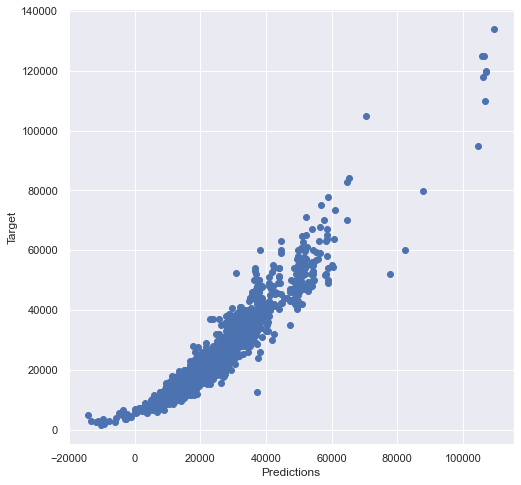

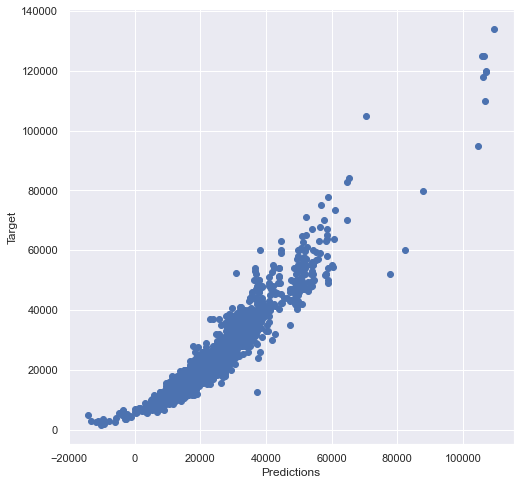

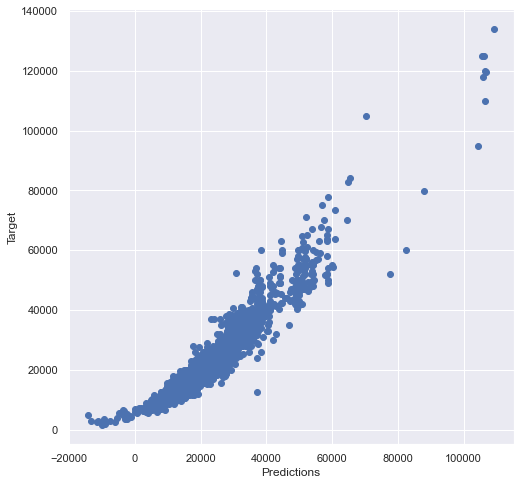

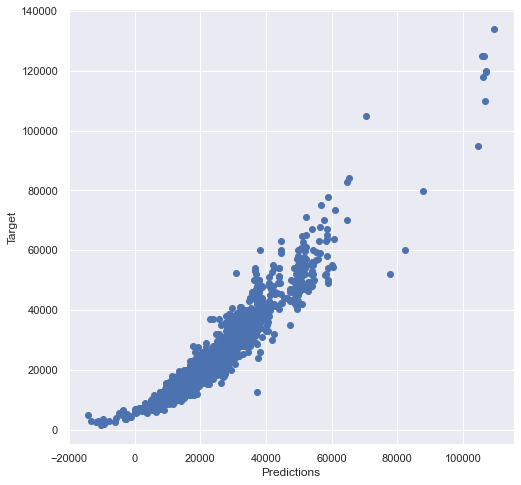

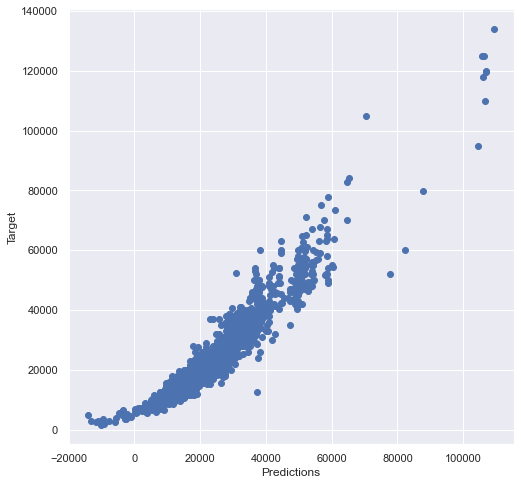

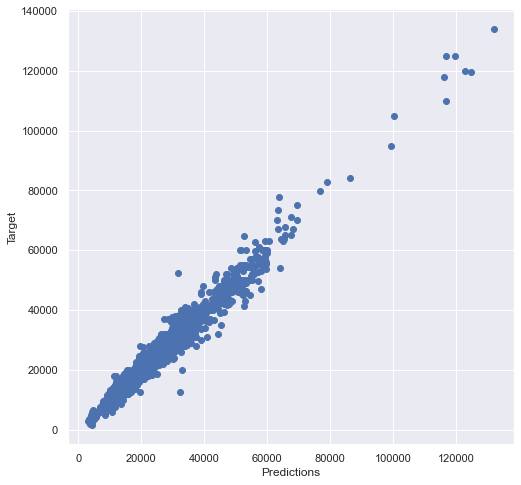

In [52]:
rmse(linear, nameof(linear), X_train_scaled, X_test_scaled, Y_train, Y_test)
rmse(lasso, nameof(lasso), X_train_scaled, X_test_scaled, Y_train, Y_test)
rmse(lassocv, nameof(lassocv), X_train_scaled, X_test_scaled, Y_train, Y_test)
rmse(ridge, nameof(ridge), X_train_scaled, X_test_scaled, Y_train, Y_test)
rmse(ridgecv, nameof(ridgecv), X_train_scaled, X_test_scaled, Y_train, Y_test)
rmse(forest, nameof(forest), X_train_scaled, X_test_scaled, Y_train, Y_test)

model: lineard train:  4461.56 ,  0.852 test:  4166.463 ,  0.878
model: lassod train:  4461.581 ,  0.852 test:  4165.892 ,  0.878
model: lassocvd train:  4462.603 ,  0.852 test:  4163.36 ,  0.878
model: ridged train:  4461.561 ,  0.852 test:  4166.458 ,  0.878
model: ridgecvd train:  4461.617 ,  0.852 test:  4166.471 ,  0.878
model: forestd train:  1156.993 ,  0.99 test:  2616.092 ,  0.952


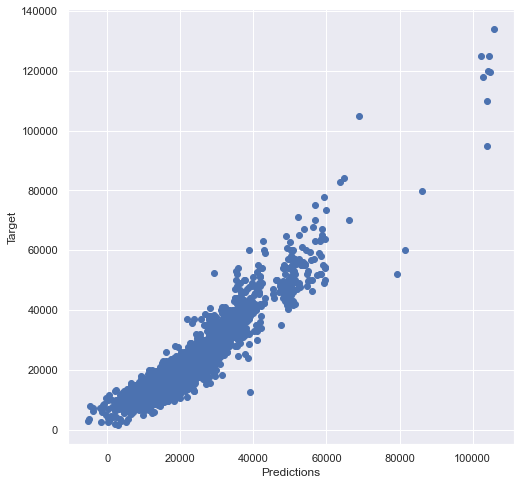

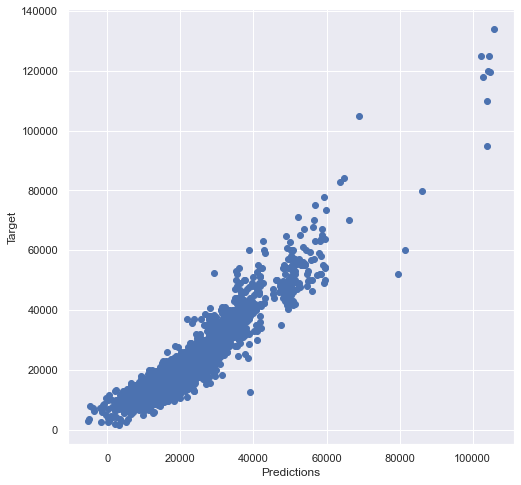

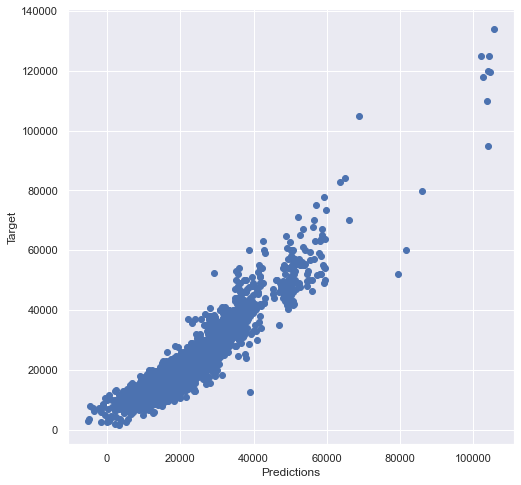

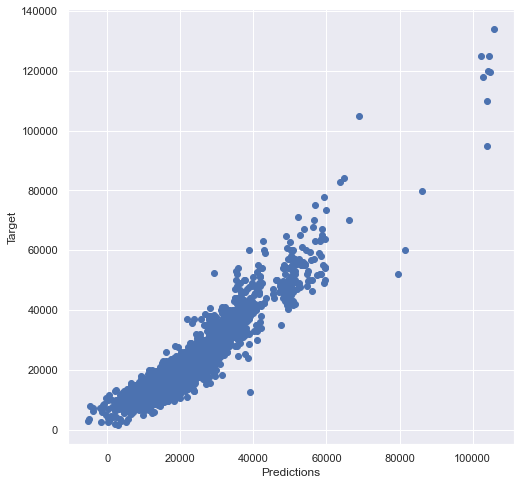

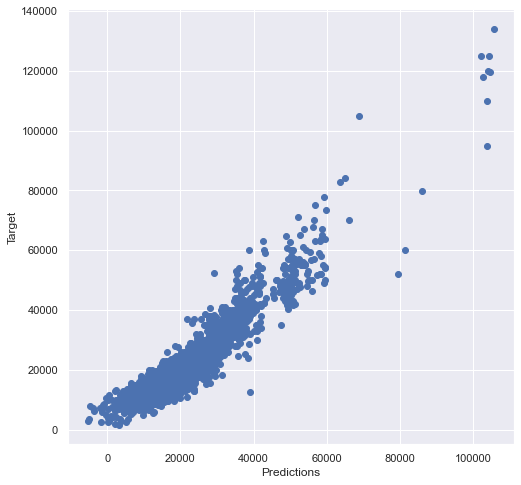

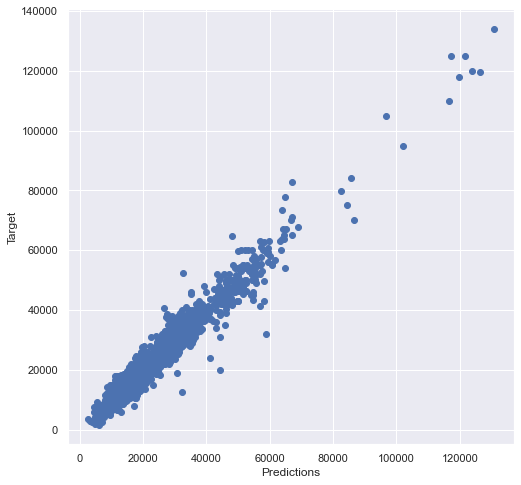

In [53]:
rmse(lineard, nameof(lineard), Xd_train_scaled, Xd_test_scaled, Yd_train, Yd_test)
rmse(lassod, nameof(lassod), Xd_train_scaled, Xd_test_scaled, Yd_train, Yd_test)
rmse(lassocvd, nameof(lassocvd), Xd_train_scaled, Xd_test_scaled, Yd_train, Yd_test)
rmse(ridged, nameof(ridged), Xd_train_scaled, Xd_test_scaled, Yd_train, Yd_test)
rmse(ridgecvd, nameof(ridgecvd), Xd_train_scaled, Xd_test_scaled, Yd_train, Yd_test)
rmse(forestd, nameof(forestd), Xd_train_scaled, Xd_test_scaled, Yd_train, Yd_test)

model: linearb train:  4539.684 ,  0.847 test:  4544.924 ,  0.855
model: lassob train:  4539.763 ,  0.847 test:  4546.55 ,  0.855
model: lassocvb train:  4543.29 ,  0.847 test:  4558.313 ,  0.854
model: ridgeb train:  4539.985 ,  0.847 test:  4548.515 ,  0.855
model: ridgecvb train:  4539.687 ,  0.847 test:  4545.273 ,  0.855
model: forestb train:  1013.576 ,  0.992 test:  2192.65 ,  0.966


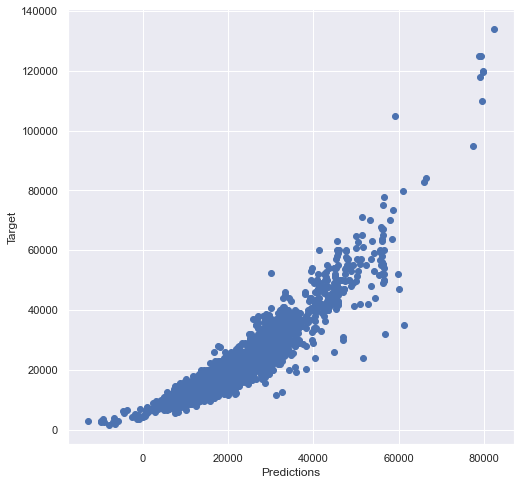

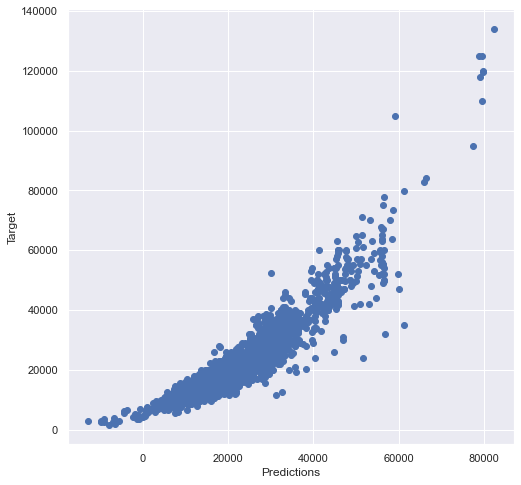

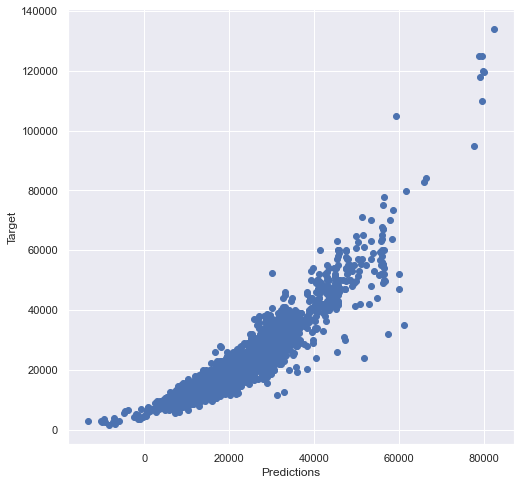

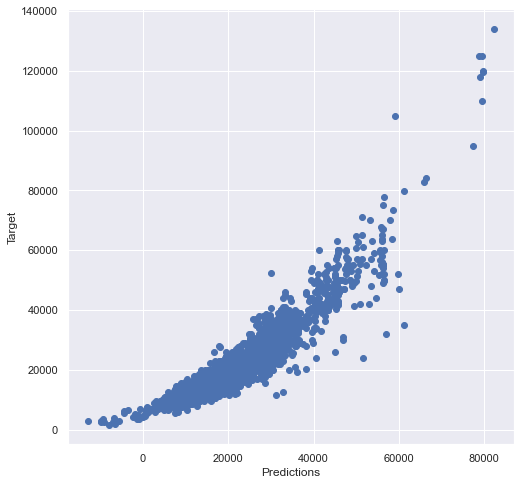

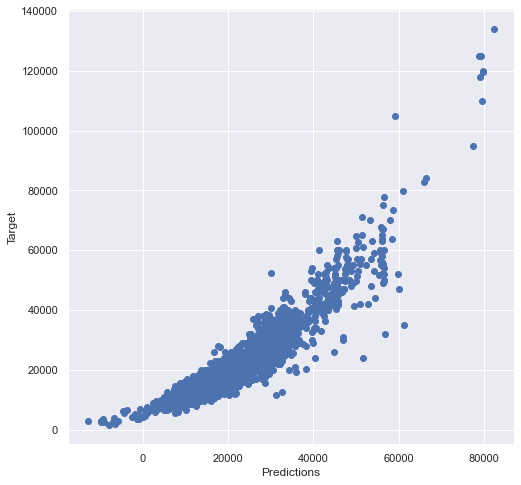

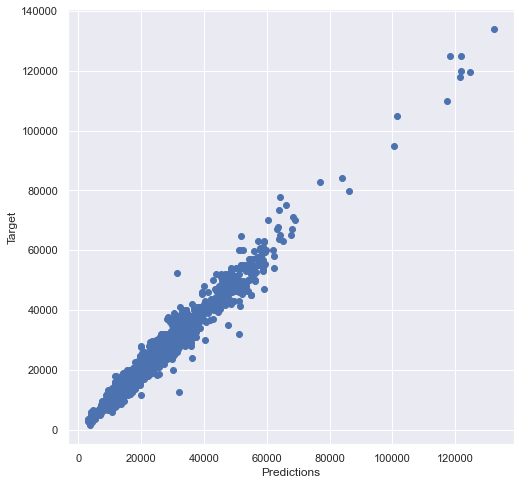

In [54]:
rmse(linearb, nameof(linearb), Xb_train_scaled, Xb_test_scaled, Yb_train, Yb_test)
rmse(lassob, nameof(lassob), Xb_train_scaled, Xb_test_scaled, Yb_train, Yb_test)
rmse(lassocvb, nameof(lassocvb), Xb_train_scaled, Xb_test_scaled, Yb_train, Yb_test)
rmse(ridgeb, nameof(ridgeb), Xb_train_scaled, Xb_test_scaled, Yb_train, Yb_test)
rmse(ridgecvb, nameof(ridgecvb), Xb_train_scaled, Xb_test_scaled, Yb_train, Yb_test)
rmse(forestb, nameof(forestb), Xb_train_scaled, Xb_test_scaled, Yb_train, Yb_test)

In [55]:
auto_data.describe()['price']

count     10666.000
mean      22900.605
std       11712.439
min        1699.000
25%       15162.250
50%       20200.000
75%       27990.000
max      145000.000
Name: price, dtype: float64

In [56]:
#Лучшие результаты показало OneHot кодирование с большим отрывом
#Примерно одинаковые результаты показали dummy и binary кодирования

In [57]:
# По факту сейчас не раскрыт потенциал CV, так как по факту еще ничего не делали с альфами
# Но судя по среднеквадратичному отклонению любая наша модель лучше на порядок
# Линейная регрессия просто перепила и пора спать
# А рандомный лес впереди планеты всей

In [58]:
alphas = np.linspace(1, 10, 20)
alphas

array([ 1.   ,  1.474,  1.947,  2.421,  2.895,  3.368,  3.842,  4.316,
        4.789,  5.263,  5.737,  6.211,  6.684,  7.158,  7.632,  8.105,
        8.579,  9.053,  9.526, 10.   ])

In [59]:
lassocv_a = LassoCV()
lassocv_a.fit(X_train_scaled, Y_train)

LassoCV()

model: lassocv_a train:  3802.339 ,  0.893 test:  3625.249 ,  0.908


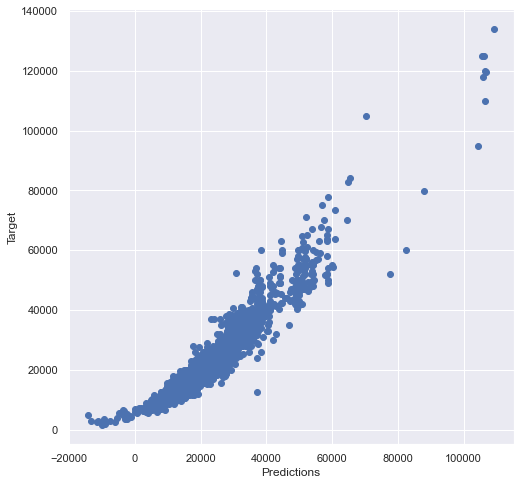

In [60]:
rmse(lassocv_a, nameof(lassocv_a), X_train_scaled, X_test_scaled, Y_train, Y_test)

In [61]:
coef = pd.DataFrame(zip(['intercept'] + Xb.columns.tolist(), [linearb.intercept_] + linearb.coef_.tolist()),
                       columns = ['predictor', 'coef'])
coef

,predictor,coef
0,intercept,2.288e+04
1,model_0,0.000e+00
2,model_1,2.035e+03
3,model_2,9.028e+02
4,model_3,7.792e+02
5,model_4,7.524e+01
6,model_5,-3.696e+02
7,year,4.049e+03
8,transmission_0,-2.001e-11
9,transmission_1,5.979e+02
